# Analysis of Test Set 1
This notebook allows for the analysis and reproduction of the figures associated with the scientific publication of this work.
Upon running this notebook, the figures will be produced and saved under `figures`.

In [36]:
import glob
import math
import os
import re
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties

from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import host_subplot


 Define functions:

In [37]:
# Function to check if a value can be converted to a float.
def is_float(string: any) -> bool:
    if string is None:
        return False
    try:
        float(string)
        return True
    except ValueError:
        return False

# Function to extract all properties from an sdf file. (takes regex paths as input) 
def extract_properties_from_sdf(pathname):
    if not os.path.isfile(pathname):
        print("ERROR: file '%s' is missing!" % pathname)
        quit(1)
    pattern = re.compile("^> *<.*>$")
    all_values = {}
    with open(pathname, "r") as input_file:
        lines = input_file.readlines()
        for index, line in enumerate(lines):
            if pattern.match(line):
                property_name = re.split('<|>', line)[2]
                value_str = lines[index + 1].rstrip()
                if is_float(value_str):
                    all_values[property_name] = float(value_str)
                else:
                    all_values[property_name] = value_str
    return all_values

In [38]:
# Collect paths to all the sdf files of test set 1 in 'pathnames' variable.
pathnames = sorted(glob.glob('*/*_out.sdf'))

In [39]:
# store paths to catalyst groups (AF) in separate variables
H0_paths = []; HI_paths = []; HIIprime_paths = []; HII_paths = []; HC1Ph_paths = []
for pathname in pathnames:
    if "H0_" in pathname:
        H0_paths.append(pathname)
    if "HI_" in pathname:
        HI_paths.append(pathname)    
    if "HIIprime_" in pathname:
        HIIprime_paths.append(pathname)
    if "HII_" in pathname:
        HII_paths.append(pathname)
    if "HC1Ph_" in pathname:
        HC1Ph_paths.append(pathname)
        
print("Total number of AF Candidates = " + str(len(H0_paths + HI_paths + HIIprime_paths + HII_paths + HC1Ph_paths)))

Total number of AF Candidates = 30


In [40]:
# Now we calculate the mean of selected sdf properties (energies, descriptor, weights etc.) within each catalyst group.
# The mean values are then stored in separate arrays for further use bellow.
# Finally, we print a simple overview of the fitness, descriptors and weights.

# define arrays containing catalyst groups paths and names.
catalyst_groups = [H0_paths, HI_paths, HIIprime_paths, HII_paths, HC1Ph_paths]
catalyst_name = ['H0', 'HI', 'HIIprime', 'HII', 'HC1Ph']
# All arrays that contains values derived from the set complete of catalyst (test set 1) 
# will adhear to the index above (arr[0] = H0 value, arr[1] = HI value ... ) 

# define arrays containing desired properties (averages).
fitnesses = []; d1s = []; d2s = []; d3s = []; w1s = []; w2s = []; w3s = []; w4s = []
AFenergyA = []; AFenergyE = []; AFenergyF = []; AFenergyC = []; AFenergyD = []; AFenergyX = []; AFenergyZ = []; AFenergyL = []

# define array containing desired properties (standard deviations).
fitnessStds = []; d1Stds = []; d2Stds = []; d3Stds = []; w1Stds = []; w2Stds = []; w3Stds = []; w4Stds = []
AFenergyA_std = []; AFenergyD_std = []; AFenergyX_std = []; AFenergyZ_std = []

# Loop over each catalyst group to extract mean values and standardard deviations. 
i = 0
for group in catalyst_groups:
    rows = []
    for candidate in group:
        rows.append(extract_properties_from_sdf(candidate))
        
    # Definte pandas datafram with all extracted properties, from all candidates.
    df = pd.DataFrame(rows)

    # colelct mean values from descriptors and weights.
    fitness = str(df.agg({'FITNESS': ['mean']})).split()[2]; fitnesses.append(float(fitness))
    fitnessStd = str(df.agg({'FITNESS': ['std']})).split()[2]
    print('Fitness: ' + str(round(float(fitness), 2)) + ' (St.dev: ' + str(round(float(fitnessStd), 2)) + ')')
    d1 = str(df.agg({'DESCRIPTOR_1': ['mean']})).split()[2]; d1s.append(float(d1))
    d2 = str(df.agg({'DESCRIPTOR_2': ['mean']})).split()[2]; d2s.append(float(d2))
    d3 = str(df.agg({'DESCRIPTOR_3': ['mean']})).split()[2]; d3s.append(float(d3))
    w1 = str(df.agg({'WEIGHT_1': ['mean']})).split()[2]; w1s.append(float(w1))
    w2 = str(df.agg({'WEIGHT_2': ['mean']})).split()[2]; w2s.append(float(w2))
    w3 = str(df.agg({'WEIGHT_3': ['mean']})).split()[2]; w3s.append(float(w3))
    w4 = str(df.agg({'WEIGHT_4': ['mean']})).split()[2]; w4s.append(float(w4))

    #collect standard deviations from descriptors and weights.
    d1Stds.append(float(str(df.agg({'DESCRIPTOR_1': ['std']})).split()[2]))
    d2Stds.append(float(str(df.agg({'DESCRIPTOR_2': ['std']})).split()[2]))
    d3Stds.append(float(str(df.agg({'DESCRIPTOR_3': ['std']})).split()[2]))
    w1Stds.append(float(str(df.agg({'WEIGHT_1': ['std']})).split()[2]))
    w2Stds.append(float(str(df.agg({'WEIGHT_2': ['std']})).split()[2]))
    w3Stds.append(float(str(df.agg({'WEIGHT_3': ['std']})).split()[2]))
    w4Stds.append(float(str(df.agg({'WEIGHT_4': ['std']})).split()[2]))
    fitnessStds.append(float(str(df.agg({'FITNESS': ['std']})).split()[2]))

    #collect mean values from potential energies.
    AFenergyA.append(float(str(df.agg({'freeEnergyA': ['mean']})).split()[2]))
    AFenergyE.append(float(str(df.agg({'freeEnergyE': ['mean']})).split()[2]))
    AFenergyF.append(float(str(df.agg({'freeEnergyF': ['mean']})).split()[2]))
    AFenergyC.append(float(str(df.agg({'freeEnergyC': ['mean']})).split()[2]))
    AFenergyD.append(float(str(df.agg({'freeEnergyD': ['mean']})).split()[2]))
    AFenergyX.append(float(str(df.agg({'freeEnergyX': ['mean']})).split()[2]))
    AFenergyZ.append(float(str(df.agg({'freeEnergyZ': ['mean']})).split()[2]))
    AFenergyL.append(float(str(df.agg({'freeEnergyL': ['mean']})).split()[2]))

    AFenergyD_std.append(float(str(df.agg({'freeEnergyA': ['std']})).split()[2]))
    AFenergyA_std.append(float(str(df.agg({'freeEnergyA': ['std']})).split()[2]))
    AFenergyX_std.append(float(str(df.agg({'freeEnergyA': ['std']})).split()[2]))
    AFenergyZ_std.append(float(str(df.agg({'freeEnergyA': ['std']})).split()[2]))
    
    # print overview.
    print(f"candidate: {catalyst_name[i]}")
    print('D1: ' + str(round(float(d1), 2)))
    print('D2: ' + str(round(float(d2), 2)))
    print('D3: ' + str(round(float(d3), 2)))
    print('w1: ' + str(round(float(w1), 2)))
    print('w2: ' + str(round(float(w2), 2)))
    print('w3: ' + str(round(float(w3), 2)))
    print('w4: ' + str(round(float(w4), 2)))

    i = i + 1
    
# Exract individual energies from each catalyst group
patterns = ["> <freeEnergyA>", "> <freeEnergyF>", "> <freeEnergyE>", "> <freeEnergyC>", "> <freeEnergyD>","> <freeEnergyL>", "> <freeEnergyX>", "> <freeEnergyZ>"]
AF_EnergyA = []; AF_EnergyF = []; AF_EnergyE = []; AF_EnergyC = []; AF_EnergyD = []; AF_EnergyL = []; AF_EnergyX = []; AF_EnergyZ = []
AF_Energies = [AF_EnergyA, AF_EnergyF, AF_EnergyE, AF_EnergyC, AF_EnergyD, AF_EnergyL, AF_EnergyX, AF_EnergyZ]

for group in catalyst_groups:
    for pathname in group:
        i = 0
        with open(pathname, "r") as input_file:
            lines = input_file.readlines()
            for pattern in patterns:
                for index, line in enumerate(lines):
                #for pattern in patterns:
                    pattern = re.compile(pattern)
                    if pattern.match(line):
                        property_name = re.split('<|>', line)[2]
                        value_str = lines[index + 1].rstrip()
                        if is_float(value_str):
                            AF_Energies[i].append(float(value_str))
                            i = i + 1
    

Fitness: 0.0 (St.dev: 0.0)
candidate: H0
D1: 0.0
D2: 1.47
D3: 2.66
w1: 1.0
w2: 0.0
w3: 0.04
w4: 1.0
Fitness: 3.45 (St.dev: 1.71)
candidate: HI
D1: 0.0
D2: 5.17
D3: 0.21
w1: 1.0
w2: 0.69
w3: 0.9
w4: 1.0
Fitness: 13.66 (St.dev: 0.01)
candidate: HIIprime
D1: 0.23
D2: 13.05
D3: 0.38
w1: 1.0
w2: 1.0
w3: 1.0
w4: 1.0
Fitness: 14.95 (St.dev: 0.02)
candidate: HII
D1: 1.0
D2: 13.95
D3: 0.0
w1: 1.0
w2: 1.0
w3: 1.0
w4: 1.0
Fitness: 19.91 (St.dev: 6.86)
candidate: HC1Ph
D1: 5.87
D2: 14.54
D3: 0.0
w1: 0.98
w2: 1.0
w3: 1.0
w4: 1.0


In [41]:
# Calculate barriers from AF values

# Constant energies
E_propene=-117.738020895
E_ethene=-78.4716324751
E_Hoveyda=-502.204109499
hartree_to_kcalmol=627.49467516

AF_BarriersBHE_from_precursor = [] # Barriers to B-HE with respect to the precursor 
AF_BarriersMetathesis_from_precursor = [] # Barriers to metathesis with respect to the precursor
AF_BarriersBHE_from_MCB = [] # Barriers to B-HE with respect to the MCB 
AF_BarriersMetathesis_from_MCB = [] # Barriers to metathesis with respect to the MCB

i = 0
while i < len(AFenergyA):

    # Calculate barriers to B-H elimination wrt. MCB:
    AF_BHE_MCB = (AFenergyZ[i] - AFenergyD[i]) * hartree_to_kcalmol
    AF_BarriersBHE_from_MCB.append(AF_BHE_MCB)
        
    # Calculate barriers to metathesis wrt. MCB:
    AF_Metathesis_MCB = (AFenergyX[i] + (2 * E_ethene) - AFenergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_BarriersMetathesis_from_MCB.append(AF_Metathesis_MCB)
    i = i + 1

# Calculate metathesis/B-H elim. barriers from AF energy values for each candidate
AF_H0_BH_bar=[]; AF_HI_BH_bar=[]; AF_HIIprime_BH_bar=[]; AF_HII_BH_bar=[]; AF_HC1Ph_BH_bar=[]
AF_H0_met_bar=[]; AF_HI_met_bar=[]; AF_HIIprime_met_bar=[]; AF_HII_met_bar=[]; AF_HC1Ph_met_bar=[]

i = 0
while i < 6:
    # Calculate barriers to B-H elimination wrt. MCB:
    BH_bar = (AF_EnergyZ[i] - AF_EnergyD[i]) * hartree_to_kcalmol
    AF_H0_BH_bar.append(BH_bar)
    # Calculate barriers to metathesis wrt. MCB:
    met_bar = (AF_EnergyX[i] + (2 * E_ethene) - AF_EnergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_H0_met_bar.append(met_bar)
    i = i + 1

while i < 12:
    # Calculate barriers to B-H elimination wrt. MCB:
    BH_bar = (AF_EnergyZ[i] - AF_EnergyD[i]) * hartree_to_kcalmol
    AF_HI_BH_bar.append(BH_bar)
    # Calculate barriers to metathesis wrt. MCB:
    met_bar = (AF_EnergyX[i] + (2 * E_ethene) - AF_EnergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_HI_met_bar.append(met_bar)
    i = i + 1

while i < 18:
    # Calculate barriers to B-H elimination wrt. MCB:
    BH_bar = (AF_EnergyZ[i] - AF_EnergyD[i]) * hartree_to_kcalmol
    AF_HIIprime_BH_bar.append(BH_bar)
    # Calculate barriers to metathesis wrt. MCB:
    met_bar = (AF_EnergyX[i] + (2 * E_ethene) - AF_EnergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_HIIprime_met_bar.append(met_bar)
    i = i + 1

while i < 24:
    # Calculate barriers to B-H elimination wrt. MCB:
    BH_bar = (AF_EnergyZ[i] - AF_EnergyD[i]) * hartree_to_kcalmol
    AF_HII_BH_bar.append(BH_bar)
    # Calculate barriers to metathesis wrt. MCB:
    met_bar = (AF_EnergyX[i] + (2 * E_ethene) - AF_EnergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_HII_met_bar.append(met_bar)
    i = i + 1

while i < 30:
    # Calculate barriers to B-H elimination wrt. MCB:
    BH_bar = (AF_EnergyZ[i] - AF_EnergyD[i]) * hartree_to_kcalmol
    AF_HC1Ph_BH_bar.append(BH_bar)
    # Calculate barriers to metathesis wrt. MCB:
    met_bar = (AF_EnergyX[i] + (2 * E_ethene) - AF_EnergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_HC1Ph_met_bar.append(met_bar)
    i = i + 1 

In [42]:
# Extract energies from HQF.

HQF_paths = []
sorted_HQF_names = ['H0HQF', 'HIHQF', 'HIIprimeHQF', 'HIIHQF', 'HC1PhHQF']
sorted_HQF_paths = []

for pathname in pathnames:
    for name in sorted_HQF_names:
        if pathname in name or name in pathname:
            HQF_paths.append(pathname)
for name in sorted_HQF_names:
    for path in HQF_paths:
        if name in path:
            sorted_HQF_paths.append(path) 

patterns = ["> <freeEnergyA>", "> <freeEnergyF>", "> <freeEnergyE>", "> <freeEnergyC>","> <freeEnergyL>", "> <freeEnergyX>", "> <freeEnergyZ>"]
HQFfreeEnergyA, HQFfreeEnergyF, HQFfreeEnergyE, HQFfreeEnergyC, HQFfreeEnergyL, HQFfreeEnergyX, HQFfreeEnergyZ = [], [], [], [], [], [], []
HQFfreeEnergies= [HQFfreeEnergyA, HQFfreeEnergyF, HQFfreeEnergyE, HQFfreeEnergyC, HQFfreeEnergyL, HQFfreeEnergyX, HQFfreeEnergyZ]

for pathname in sorted_HQF_paths:
    i = 0
    with open(pathname, "r") as input_file:
            lines = input_file.readlines()
            for index, line in enumerate(lines):
                for pattern in patterns:
                    pattern = re.compile(pattern)
                    if pattern.match(line):
                        property_name = re.split('<|>', line)[2]
                        value_str = lines[index + 1].rstrip()
                        if is_float(value_str):
                            HQFfreeEnergies[i].append(float(value_str))
                            i = i + 1

In [43]:
# Calculating barriers from HQF energies, then calculate the descriptors, weights and overall fitness.

# Defining variables
BarriersBHE_from_precursor = [] # Barriers to B-HE with respect to the precursor 
BarriersMetathesis_from_precursor = [] # Barriers to metathesis with respect to the precursor
BarriersBHE_from_MCB = [] # Barriers to B-HE with respect to the MCB 
BarriersMetathesis_from_MCB = [] # Barriers to metathesis with respect to the MCB
HQF_fitnesses = []; HQFd1s = []; HQFd2s = []; HQFd3s = []; HQFw1s = []; HQFw2s = []; HQFw3s = []; HQFw4s = []
ddE_stability_HI = hartree_to_kcalmol * math.fabs(HQFfreeEnergyC[3] - HQFfreeEnergyA[3] - HQFfreeEnergyC[1] + HQFfreeEnergyA[1])
# Defining constants (free energies [hartree] of substrates, conversion factors etc.)
G_ethene = -78.477866552
G_propene = -117.734910132
G_Hoveyda = -502.210801644
hartree_to_kcalmol = 627.4946752
kT = 0.622308995 # NB: in Kcal/mol
epsilon = 5.73163236
delta = 1.43290809
Lambda = 1.43290809
sigma = 2.86581618

i = 0
# Check for inconsistancies in the data set
if not len(HQFfreeEnergyA) == len(HQFfreeEnergyF) == len(HQFfreeEnergyE) == len(HQFfreeEnergyC) == len(HQFfreeEnergyX) == len(HQFfreeEnergyZ) == len(HQFfreeEnergyL):
    print('Error: inconsistant number of energy values')
    quit(1)
else:
    while i < len(HQFfreeEnergyA):
        # Calculate barriers to B-H elimination wrt. precursor:
        BHE_P = ((HQFfreeEnergyZ[i] + G_Hoveyda) - (HQFfreeEnergyA[i] + (2 * G_ethene))) * hartree_to_kcalmol
        BarriersBHE_from_precursor.append(BHE_P)
        
        # Calculate barriers to metathesis wrt. precursor:
        Metathesis_P = ((HQFfreeEnergyX[i] + G_Hoveyda) - (HQFfreeEnergyA[i] + (2 * G_propene))) * hartree_to_kcalmol
        BarriersMetathesis_from_precursor.append(Metathesis_P)

        # Calculate barriers to B-H elimination wrt. MCB:
        BHE_MCB = (HQFfreeEnergyZ[i] - HQFfreeEnergyC[i]) * hartree_to_kcalmol
        BarriersBHE_from_MCB.append(BHE_MCB)
        
        # Calculate barriers to metathesis wrt. MCB:
        Metathesis_MCB = (HQFfreeEnergyX[i] + (2 * G_ethene) - HQFfreeEnergyC[i] - (2 * G_propene)) * hartree_to_kcalmol
        BarriersMetathesis_from_MCB.append(Metathesis_MCB)
        i = i + 1

i = 0        
while i < len(HQFfreeEnergyA):
    # Calculate descriptor 1 (d1) values:
    HQFd1 = math.exp((( BarriersBHE_from_MCB[i] - BarriersMetathesis_from_MCB[i] ) - ( BarriersBHE_from_MCB[3] - BarriersMetathesis_from_MCB[3] )) / kT )
    HQFd1s.append(HQFd1)

    # Calculate descriptor 2 (d2) values:
    HQFd2 = BarriersBHE_from_MCB[i] - BarriersMetathesis_from_MCB[i]
    HQFd2s.append(HQFd2)

    # Calculate descriptor 3 (d3) values:
    if BarriersMetathesis_from_MCB[3] - BarriersMetathesis_from_MCB[i] > 0:
        HQFd3 = BarriersMetathesis_from_MCB[3] - BarriersMetathesis_from_MCB[i]
        HQFd3s.append(HQFd3)
    else:
        HQFd3 = 0.0
        HQFd3s.append(HQFd3)

    # calculate weight 1 (w1) values:
    HQFw1 = 1 / (1 + math.exp((BarriersMetathesis_from_MCB[i] - (BarriersMetathesis_from_MCB[3] + epsilon) ) / kT))
    HQFw1s.append(HQFw1)

    # calculate weight 2 (w2) values:
    HQFw2 = 1 / (1 + math.exp(((hartree_to_kcalmol * (math.fabs(HQFfreeEnergyC[3] - HQFfreeEnergyA[3] - HQFfreeEnergyC[i] + HQFfreeEnergyA[i])) - (ddE_stability_HI + delta)) / kT)))
    HQFw2s.append(HQFw2)

    # calculate weight 3 (w3) values:
    dE_synt = hartree_to_kcalmol * (HQFfreeEnergyA[i] + HQFfreeEnergyL[1] - HQFfreeEnergyA[1] - HQFfreeEnergyL[i])
    HQFw3 = 1 / (1 + math.exp((dE_synt - Lambda) / kT))
    HQFw3s.append(HQFw3)

    # calculate weight 4 (w4) values:
    dE_stereo = hartree_to_kcalmol * (HQFfreeEnergyF[i] - HQFfreeEnergyA[i])
    HQFw4 = 1 / (1 + math.exp((sigma - dE_stereo) / kT))
    HQFw4s.append(HQFw4)

    HQF_fitness = (HQFd1 + HQFd2 + HQFd3) * HQFw1 * HQFw2 * HQFw3 * HQFw4
    HQF_fitnesses.append(HQF_fitness)
                 
    i = i + 1

HQF_descriptors = [HQFd1s, HQFd2s, HQFd3s, HQFw1s, HQFw2s, HQFw3s, HQFw4s, HQF_fitnesses]
r_HQFd1s='';r_HQFd2s='';r_HQFd3s='';r_HQFw1s='';r_HQFw2s='';r_HQFw3s='';r_HQFw4s='';r_HQF_fitnesses=''
rounded_HQF_descriptors = [r_HQFd1s, r_HQFd2s, r_HQFd3s, r_HQFw1s, r_HQFw2s, r_HQFw3s, r_HQFw4s, r_HQF_fitnesses]
i = 0
for desc in HQF_descriptors:
    rounded_HQF_descriptors[i] = [ round(elem, 1) for elem in desc ]; i = i + 1

# Printing HQF descriptor/weights overview.
print('property  H0   HI   HII\' HII  HC1Ph')
print('d1:      '+str(rounded_HQF_descriptors[0]))
print('d2:      '+str(rounded_HQF_descriptors[1]))
print('d3:      '+str(rounded_HQF_descriptors[2]))
print('w1:      '+str(rounded_HQF_descriptors[3]))
print('w2:      '+str(rounded_HQF_descriptors[4]))
print('w3:      '+str(rounded_HQF_descriptors[5]))
print('w4:      '+str(rounded_HQF_descriptors[6]))
print('Fitness: '+str(rounded_HQF_descriptors[7]))

property  H0   HI   HII' HII  HC1Ph
d1:      [0.0, 0.0, 0.2, 1.0, 12.8]
d2:      [4.4, 4.8, 11.1, 12.0, 13.6]
d3:      [3.2, 1.2, 0.5, 0.0, 0.0]
w1:      [1.0, 1.0, 1.0, 1.0, 1.0]
w2:      [0.0, 0.9, 1.0, 1.0, 1.0]
w3:      [0.6, 0.9, 1.0, 1.0, 1.0]
w4:      [1.0, 1.0, 1.0, 1.0, 1.0]
Fitness: [0.0, 5.0, 11.9, 13.0, 26.4]


Below, we plot the two barriers to metathesis and to decomposition together with the HQ fitness to demonstrate that the barriers by themselves cannot reproduce the ranks expected from literature, and observed in lab experiments.

Here, we decompose the HQF fitness into descriptors and weights for a closer inspection:

Comparison of high-quality fitness (HQF) scores and barriers
to propene self-metathesis and decomposition via b-HE as calculated
relative to Ru-P for the test-set catalysts.


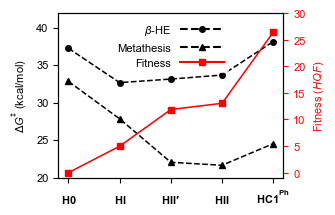

In [44]:
from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings('ignore')

# Font settings
fontSize = 8
axisTitleFontSize = fontSize
plt.rcParams['font.size'] = fontSize
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:bold'

# Size of markers and caps in plots
mSize = 4
cSize = mSize * 0.75

# General line width for series
seriesLineWidth = 1.1
# and error bars
ebLineWidth = seriesLineWidth*0.85
# and grid
gridLineWidth = seriesLineWidth*0.33

catalyst = ["$\mathbf{H0}$", "$\mathbf{HI}$",  "$\mathbf{HII\prime}$", "$\mathbf{HII}$", "$\mathbf{HC1^{Ph}}$"]
fig = plt.figure(figsize=(3.18, 2.2))
ax = fig.add_subplot(axes_class=axisartist.Axes)

# Plotting on the primary y-axis
ax.plot(catalyst, BarriersBHE_from_precursor, linestyle='dashed', linewidth=seriesLineWidth, marker='o',  markersize=mSize, color='black', label='$\\beta$-HE')
ax.plot(catalyst, BarriersMetathesis_from_precursor, linestyle='dashed', linewidth=seriesLineWidth, marker='^',  markersize=mSize, markerfacecolor='black', color='black', label='Metathesis')
ax.set_xlabel('')
ax.set_ylabel("$\Delta G^{\u2021}$ (kcal/mol)", fontsize=axisTitleFontSize)

# Adjusting tick marks
ax.axis["top","right"].toggle(all=False)
ax.axis[:].major_ticks.set_tick_out(True)

# set -y-axis limits for the first axis
ax.set_ylim(20, 42)

# Creating a secondary y-axis
ax = ax.twinx()
ax.plot(catalyst[0:], HQF_fitnesses[0:], color='red', label='HQF_fitnesses', linewidth=seriesLineWidth, marker='s', markersize=mSize, markerfacecolor='red')
ax.set_ylabel('Fitness ($\mathit{HQF}$)', color='red')

handels = [
    Line2D([0], [0], linestyle='dashed', marker='o', markersize=mSize, markerfacecolor='black', color='black'),
    Line2D([0], [0], linestyle='dashed', marker='^', markersize=mSize, markerfacecolor='black', color='black'),
    Line2D([0], [0], linestyle='solid', marker='s', markersize=mSize, markerfacecolor='red', color='red')
]

labels = [
    '$\\beta$-HE',
    'Metathesis',
    'Fitness'
]

# Adjust legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height])
leg = ax.legend(handels, labels, handlelength=4, markerfirst=False, loc='upper center', ncol=1)
leg.get_frame().set_linewidth(0.0)

# Set y-axis limits for the secondary axis
ax.set_ylim(-1, 30)

# Set the color of the y-axis ticks for the secondary axis
ax.tick_params(axis='y', colors='red')


plt.tight_layout()
plt.savefig("figures/Fitness_vs_barriers.svg", format="svg", bbox_inches="tight")
print('Comparison of high-quality fitness (HQF) scores and barriers\nto propene self-metathesis and decomposition via b-HE as calculated\nrelative to Ru-P for the test-set catalysts.')

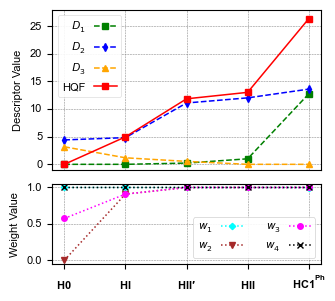

Overall fitness (HQF) and its individual components (weights and descriptors):
D1, reward for high catalyst productivity; D2, resolution of low catalyst productivity;
D3, reward for high catalyst activity; w1, threshold against low catalyst activity;
w2, initiation-based catalyst elimination; w3, synthetic accessibility-based catalyst elimination;
w4, stereochemistry-based catalyst elimination.


In [45]:
# Create a figure with two subplots in a 2:1 ratio
fig = plt.figure(figsize=(3.18, 3))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])

# Specify axis type for the first subplot
ax1 = host_subplot(gs[0], axes_class=axisartist.Axes)
fig.add_axes(ax1)

# Specify axis type for the second subplot
ax2 = host_subplot(gs[1], axes_class=axisartist.Axes)
fig.add_axes(ax2)

catLabel = catalyst

# Plotting on the primary y-axis
ax1.plot(catLabel, HQFd1s, linestyle='dashed', linewidth=seriesLineWidth, marker='s', markersize=mSize, markerfacecolor='green', color='green', label="$\mathit{D_{1}}$")
ax1.plot(catLabel, HQFd2s, linestyle='dashed', linewidth=seriesLineWidth, marker='d', markersize=mSize, markerfacecolor='blue', color='Blue', label="$\mathit{D_{2}}$")
ax1.plot(catLabel, HQFd3s, linestyle='dashed', linewidth=seriesLineWidth, marker='^', markersize=mSize, markerfacecolor='orange', color='orange', label="$\mathit{D_{3}}$")
ax1.plot(catLabel, HQF_fitnesses, linestyle='solid', linewidth=seriesLineWidth, marker='s', markersize=mSize, markerfacecolor='red', color='red', label="HQF")

# Set labels
ax1.set_xlabel('')
ax1.set_ylabel("Descriptor Value", fontsize=axisTitleFontSize)

# Create a custom legend with the desired order
handles = [
    Line2D([0], [0], linestyle='dashed', marker='D', markerfacecolor='green', color='green'),
    Line2D([0], [0], linestyle='dashed', marker='v', markerfacecolor='blue', color='Blue'),
    Line2D([0], [0], linestyle='dashed', marker='o', markerfacecolor='orange', color='orange'),
    Line2D([0], [0], linestyle='solid', marker='s', markerfacecolor='red', color='red')
]

labels = [
    "$\mathit{D_{1}}$",
    "$\mathit{D_{2}}$",
    "$\mathit{D_{3}}$",
    "HQF"
]

# Set custom legend
leg = ax1.legend(markerfirst=False, loc='best', ncol=1, frameon=True, framealpha=0.9)
leg.get_frame().set_linewidth(gridLineWidth)
plt.grid(color='gray',linestyle='--',linewidth=gridLineWidth)

# Adjust grid and tick marks/labels
ax1.grid(color='gray',linestyle='--',linewidth=gridLineWidth)
ax2.grid(color='gray',linestyle='--',linewidth=gridLineWidth)

# Hides x-axis tick marks and labels
ax1.axis["top","bottom","right"].toggle(all=False)
ax2.axis["top","right"].toggle(all=False)
ax1.axis[:].major_ticks.set_tick_out(True)
ax2.axis[:].major_ticks.set_tick_out(True)

# set -y-axis limits for the first axis
ax1.set_ylim(-1, 28)

color1 = 'cyan'; color2 = 'brown'; color3 = 'magenta'; color4 = 'black'

# Plotting on the primary y-axis
ax2.plot(catLabel, HQFw1s, linestyle=':', linewidth=seriesLineWidth, marker='D', markerfacecolor=color1, markersize=mSize*0.80, color=color1, label="$\mathit{w_{1}}$")
ax2.plot(catLabel, HQFw2s, linestyle=':', linewidth=seriesLineWidth, marker='v', markerfacecolor=color2, markersize=mSize, color=color2, label="$\mathit{w_{2}}$")
ax2.plot(catLabel, HQFw3s, linestyle=':', linewidth=seriesLineWidth, marker='o', markerfacecolor=color3, markersize=mSize, color=color3, label="$\mathit{w_{3}}$")
ax2.plot(catLabel, HQFw4s, linestyle=':', linewidth=seriesLineWidth, marker='x', markerfacecolor=color4, markersize=mSize, color=color4, label="$\mathit{w_{4}}$")

ax2.set_xlabel('')
ax2.set_ylabel("Weight Value", fontsize=axisTitleFontSize)

# Adjust legend
box = ax2.get_position()
leg = ax2.legend(markerfirst=False, loc='lower right', ncol=2, frameon=True, framealpha=0.9)
leg.get_frame().set_linewidth(0.5)
ax1.grid(color='gray',linestyle='--', linewidth=gridLineWidth)
ax2.grid(color='gray',linestyle='--', linewidth=gridLineWidth)

plt.tight_layout()
plt.savefig("figures/Descriptors_and_weights_HQF.svg", format="svg", bbox_inches="tight")
show()
print('Overall fitness (HQF) and its individual components (weights and descriptors):\nD1, reward for high catalyst productivity; D2, resolution of low catalyst productivity;\nD3, reward for high catalyst activity; w1, threshold against low catalyst activity;\nw2, initiation-based catalyst elimination; w3, synthetic accessibility-based catalyst elimination;\nw4, stereochemistry-based catalyst elimination.')

Next, we plot the HQF derived barriers against the AF derived barriers:

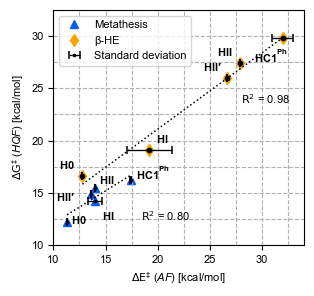

Comparison of barriers to metathesis and β-HE derived
from HQF and AF modelling, using Ru-MCB as the reference point.
Standard deviations on AF values are calculated using six different
input structures


In [46]:
fig, ax = subplots(figsize=(3.18, 3))
#fig = plt.figure(figsize=(5, 3))
#ax = fig.add_subplot(axes_class=axisartist.Axes)

# Define data
HQmet = BarriersMetathesis_from_MCB
HQBH = BarriersBHE_from_MCB
AFmet = AF_BarriersMetathesis_from_MCB
AFBH = AF_BarriersBHE_from_MCB

#define data (Sorted from lowest to highest x-value)
#DE Metathesis
x1 = np.array([AFmet[0], AFmet[2], AFmet[1], AFmet[3], AFmet[4]])
y1 = np.array([HQmet[0], HQmet[2], HQmet[1], HQmet[3], HQmet[4]])

#DE B-HE Decomposition
x2 = np.array([AFBH[0], AFBH[1], AFBH[2], AFBH[3], AFBH[4]])
y2 = np.array([HQBH[0], HQBH[1], HQBH[2], HQBH[3], HQBH[4]])

#calculate equation for trendline: Metathesis
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)

#add trendline to plot
plt.plot(x1, p1(x1), color="black", linewidth=seriesLineWidth, linestyle="dotted")

#calculate equation for trendline: B-HE
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)

#add trendline to plot
plt.plot(x2, p2(x2), color="black",linewidth=seriesLineWidth, linestyle="dotted")

AF_metathesis_barriers=[AF_H0_met_bar, AF_HI_met_bar, AF_HIIprime_met_bar, AF_HII_met_bar, AF_HC1Ph_met_bar]
AF_decomp_barriers=[AF_H0_BH_bar, AF_HI_BH_bar, AF_HIIprime_BH_bar, AF_HII_BH_bar, AF_HC1Ph_BH_bar]
x_err_metathesis=[];x_err_decomp=[]

for barrier in AF_metathesis_barriers:
    x_err_metathesis.append(statistics.stdev(barrier))
for barrier in AF_decomp_barriers:
    x_err_decomp.append(statistics.stdev(barrier))

# Define candidate names
candidate_names = ["$\mathbf{H0}$", "$\mathbf{HI}$", "$\mathbf{HII\prime}$", "$\mathbf{HII}$", "$\mathbf{HC1^{Ph}}$"]

# Define variables for plot style
EBfmt='.k';csize=cSize;cthick=seriesLineWidth; mwidth=seriesLineWidth;lwidth=seriesLineWidth;msize1=mSize*1.5; msize2=mSize*1.5;color1="#055AFA";color2="#FAA505"

# Define markers/error bars for metathesis barriers and put in list
m0='';m1='';m2='';m3='';m4='';
me0='';me1='';me2='';me3='';me4='';
metathesis_markers=[m0, m1, m2, m3, m4]
metathesis_errors=[me0, me1, me2, me3, me4]

# Draw the markers/error bars in the plot.
i = 0
for error in metathesis_errors:
    error = plt.errorbar(AFmet[i], HQmet[i], xerr=x_err_metathesis[i], linestyle='none', fmt=EBfmt, markersize=msize1/2, capsize=csize, capthick=ebLineWidth, elinewidth=ebLineWidth, markeredgewidth=mwidth, zorder=2, label="Standard deviation" if i == 0 else None)
    metathesis_markers[i] = plt.plot(AFmet[i], HQmet[i], color=color1, linestyle='none', marker='^', markersize=msize1, zorder=1, label="Metathesis" if i == 0 else None)
    i = i + 1 

# Define markers/error bars for B-H elim. barriers and put in list
bh0='';bh1='';bh2='';bh3='';bh4='';
bhe0='';bhe1='';bhe2='';bhe3='';bhe4='';
decomp_markers=[bh0, bh1, bh2, bh3, bh4]
decomp_errors=[bhe0, bhe1, bhe2, bhe3, bhe4]

# Draw the markers/error bars in the plot.
i = 0
for error in decomp_errors:
    error = plt.errorbar(AFBH[i], HQBH[i], xerr=x_err_decomp[i], linestyle='none', fmt=EBfmt, capsize=csize, capthick=ebLineWidth, elinewidth=ebLineWidth, markeredgewidth=mwidth, zorder=2)
    decomp_markers[i] = plt.plot(AFBH[i], HQBH[i], color=color2, linestyle='none', marker='d', markersize=msize1, zorder=1, label=chr(946) + '-HE' if i == 0 else None)
    i = i + 1 
 
# Add labels next to B-HE markers
for i, (xi, yi) in enumerate(zip(x2, y2)):
    xoffset=-17
    yoffset=5
    if i==4:
         yoffset=-18
         xoffset=-20.5
    elif i==1:
         xoffset=5
    label = f'{candidate_names[i]}'  # You can customize the label as needed
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(xoffset,yoffset), ha='left')

# Add labels next to metathesis markers (offset to make clear distinctions)
for i, (xi, yi) in enumerate(zip(x1, y1)):
    if i==0:
         yoffset=-2
         xoffset=3
    elif i==1:
         yoffset=-19
         xoffset=8
    elif i==2:
         yoffset=0
         xoffset=-28
    elif i==3:
         yoffset=3
         xoffset=3
    elif i==4:
         yoffset=0
         xoffset=4
    label = f'{candidate_names[i]}' 
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(xoffset,yoffset), ha='left')

x_tick_values = [10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5]
y_tick_values = x_tick_values

# Filter out the tick values that are not integers for both x and y axes
integer_x_tick_values = [value for value in x_tick_values if value == int(value)]
integer_y_tick_values = [value for value in y_tick_values if value == int(value)]

# Set tick labels for integer tick values for both x and y axes
plt.xticks(integer_x_tick_values)
plt.yticks(integer_y_tick_values)

# Set empty string labels for non-integer tick values for both x and y axes
xlabels = ["" if value not in integer_x_tick_values else str(value) for value in x_tick_values]
ylabels = ["" if value not in integer_y_tick_values else str(value) for value in y_tick_values]
plt.xticks(x_tick_values, xlabels)
plt.yticks(y_tick_values, ylabels)

# Enable the grid for every tick
plt.grid(True, linestyle='--')

# Hide major ticks pointing towards empty labels for both x and y axes
for tick, xlabel, ylabel in zip(plt.gca().xaxis.get_major_ticks(), xlabels, ylabels):
    if xlabel == "":
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)

for tick, ylabel in zip(plt.gca().yaxis.get_major_ticks(), ylabels):
    if ylabel == "":
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)

# Add labels and legend
plt.xlabel('$\mathsf{\Delta E^{\u2021}}$ ($\mathit{AF}$) [kcal/mol]', fontsize=axisTitleFontSize)
plt.ylabel('$\mathsf{\Delta G^{\u2021}}$ ($\mathit{HQF}$) [kcal/mol]', fontsize=axisTitleFontSize)
plt.title('')

# Add legend to the plot
plt.legend()

# Calculate R^2 value for metathesis
y_pred = p1(x1)
residuals = y1 - y_pred
ss_residual = np.sum(residuals**2)
ss_total = np.sum((y1 - np.mean(y1))**2)
r_squared = 1 - (ss_residual / ss_total)

# Display R^2 value on the plot
plt.annotate(f'$\mathsf{{R^{2}}}$ = {r_squared:.2f}', xy=(0.35, 0.1), xycoords='axes fraction', fontsize=fontSize)

# Calculate  second R^2 value for B-HE
y_pred = p2(x2)
residuals = y2 - y_pred
ss_residual = np.sum(residuals**2)
ss_total = np.sum((y2 - np.mean(y2))**2)
r_squared = 1 - (ss_residual / ss_total)

# Display R^2 value on the plot
plt.annotate(f'$\mathsf{{R^{2}}}$ = {r_squared:.2f}', xy=(0.75, 0.6), xycoords='axes fraction', fontsize=fontSize)

plt.tight_layout()
plt.savefig("figures/Barriers_HQF_vs_AF.svg", format="svg", bbox_inches="tight")
show()
print('Comparison of barriers to metathesis and β-HE derived\nfrom HQF and AF modelling, using Ru-MCB as the reference point.\nStandard deviations on AF values are calculated using six different\ninput structures')

We also compare the results of the expert driven and the automated procedure:

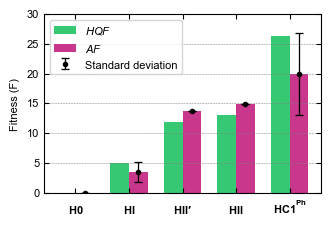

Comparison of fitness scores obtained with HQF and AF methods.
Standard deviations on AF values are calculated over data from
six different input structures. 


In [47]:
import numpy as np

categories = ['$\mathbf{H0}$', '$\mathbf{HI}$', '$\mathbf{HII\prime}$', '$\mathbf{HII}$', '$\mathbf{HC1^{Ph}}$']

fig = plt.figure(figsize=(3.18, 2.3))
ax = fig.add_subplot(axes_class=axisartist.Axes)

# Bar width
bar_width = 0.35

# Plot the bars for both groups
bar1 = ax.bar(np.arange(len(categories)), HQF_fitnesses, bar_width, color='#37C873', label='$\mathit{HQF}$')
bar2 = ax.bar(np.arange(len(categories)) + bar_width, fitnesses, bar_width, color='#C8378C', label='$\mathit{AF}$')

# Customize the error bars
ax.errorbar(np.arange(len(categories)) + bar_width, fitnesses, yerr=fitnessStds, fmt='.k', ecolor='black', elinewidth=ebLineWidth, capsize=cSize, capthick=ebLineWidth, label='Standard deviation')

ax.set_ylim(0, 30)
ax.set_yticks([0,5,10,15,20,25,30])

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('Fitness (F)', fontsize=axisTitleFontSize)
ax.set_title('')
ax.set_xticks(np.arange(len(categories)) + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()
plt.grid(axis = "y", linestyle='--', color='gray', linewidth=gridLineWidth)

# Show the plot
plt.tight_layout()
plt.savefig("figures/Fitness_HQF_AF_barplot.svg", format="svg", bbox_inches="tight")
plt.show()
print('Comparison of fitness scores obtained with HQF and AF methods.\nStandard deviations on AF values are calculated over data from\nsix different input structures. ')

Finally we look at the individual descriptors and weights of AF:

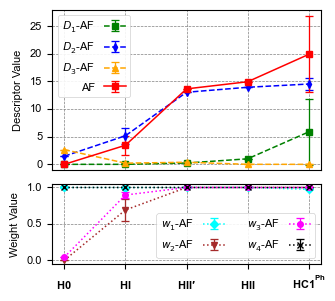

Overall fitness (AF) and the individual components: D1, reward for high catalyst productivity;
D2,resolution of low catalyst productivity; D3, reward for high catalyst activity;
w1, threshold against low catalyst activity; w2, initiation-based catalyst elimination;
w3, synthetic accessibility-based catalyst elimination; w4, stereochemistry-based catalyst elimination.


In [48]:
# Create a figure with two subplots in a 2:1 ratio
fig = plt.figure(figsize=(3.18, 3))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])

# Specify axis type for the first subplot
ax1 = host_subplot(gs[0], axes_class=axisartist.Axes)
fig.add_axes(ax1)

# Specify axis type for the second subplot
ax2 = host_subplot(gs[1], axes_class=axisartist.Axes)
fig.add_axes(ax2)

# Plotting on the primary y-axis
ax1.errorbar(catLabel, d1s, yerr=d1Stds, capsize=cSize, linestyle='dashed', linewidth=seriesLineWidth, marker='s', markersize=mSize, markerfacecolor='green', elinewidth=ebLineWidth, capthick=ebLineWidth,color='green', label="$\mathit{D_{1}}$-AF")
ax1.errorbar(catLabel, d2s, yerr=d2Stds, capsize=cSize, linestyle='dashed', linewidth=seriesLineWidth, marker='d', markersize=mSize, markerfacecolor='blue', elinewidth=ebLineWidth, capthick=ebLineWidth,color='Blue', label="$\mathit{D_{2}}$-AF")
ax1.errorbar(catLabel, d3s, yerr=d3Stds, capsize=cSize, linestyle='dashed', linewidth=seriesLineWidth, marker='^', markersize=mSize, markerfacecolor='orange', elinewidth=ebLineWidth, capthick=ebLineWidth,color='orange', label="$\mathit{D_{3}}$-AF")
ax1.errorbar(catLabel, fitnesses, yerr=fitnessStds, capsize=cSize, linestyle='solid', linewidth=seriesLineWidth, marker='s', markersize=mSize, markerfacecolor='red', elinewidth=ebLineWidth, capthick=ebLineWidth,color='red', label="AF")

# Set labels
ax1.set_xlabel('')
ax1.set_ylabel("Descriptor Value", fontsize=axisTitleFontSize)

# Create a custom legend with the desired order
handles = [
    Line2D([0], [0], linestyle='dashed', marker='D', markerfacecolor='green', color='green'),
    Line2D([0], [0], linestyle='dashed', marker='v', markerfacecolor='blue', color='Blue'),
    Line2D([0], [0], linestyle='dashed', marker='o', markerfacecolor='orange', color='orange'),
    Line2D([0], [0], linestyle='solid', marker='s', markerfacecolor='red', color='red')
]

labels = [
    "$\mathit{D_{1}}$-AF",
    "$\mathit{D_{2}}$-AF",
    "$\mathit{D_{3}}$-AF",
    "AF"
]

# Set custom legend
leg = ax1.legend(markerfirst=False, loc='best', ncol=1, frameon=True, framealpha=0.9)
leg.get_frame().set_linewidth(0.5)
plt.grid(color='gray',linestyle='--',linewidth=0.5)

# Adjust grid and tick marks/labels
ax1.grid(color='gray',linestyle='--',linewidth=0.5)
ax2.grid(color='gray',linestyle='--',linewidth=0.5)

# Hides x-axis tick marks and labels
ax1.axis["top","bottom","right"].toggle(all=False)
ax2.axis["top","right"].toggle(all=False)
ax1.axis[:].major_ticks.set_tick_out(True)
ax2.axis[:].major_ticks.set_tick_out(True)


# set -y-axis limits for the first axis
ax1.set_ylim(-1, 28)

color1 = 'cyan'; color2 = 'brown'; color3 = 'magenta'; color4 = 'black'

# Plotting on the primary y-axis
ax2.errorbar(catLabel, w1s, yerr=w1Stds, capsize=cSize, linestyle=':', linewidth=seriesLineWidth, marker='D', markerfacecolor=color1, markersize=mSize, elinewidth=ebLineWidth, capthick=ebLineWidth,color=color1, label="$\mathit{w_{1}}$-AF")
ax2.errorbar(catLabel, w2s, yerr=w2Stds, capsize=cSize, linestyle=':', linewidth=seriesLineWidth, marker='v', markerfacecolor=color2, markersize=mSize*1.1, elinewidth=ebLineWidth, capthick=ebLineWidth,color=color2, label="$\mathit{w_{2}}$-AF")
ax2.errorbar(catLabel, w3s, yerr=w3Stds, capsize=cSize, linestyle=':', linewidth=seriesLineWidth, marker='o', markerfacecolor=color3, markersize=mSize, elinewidth=ebLineWidth, capthick=ebLineWidth,color=color3, label="$\mathit{w_{3}}$-AF")
ax2.errorbar(catLabel, w4s, yerr=w4Stds, capsize=cSize, linestyle=':', linewidth=seriesLineWidth, marker='x', markerfacecolor=color4, markersize=mSize, elinewidth=ebLineWidth, capthick=ebLineWidth,color=color4, label="$\mathit{w_{4}}$-AF")

ax2.set_xlabel('')
ax2.set_ylabel("Weight Value", fontsize=axisTitleFontSize)

# Adjust legend
box = ax2.get_position()
leg = ax2.legend(markerfirst=False, loc='best', ncol=2, frameon=True, framealpha=0.9)
leg.get_frame().set_linewidth(0.5)
ax1.grid(color='gray',linestyle='--',linewidth=0.5)
ax2.grid(color='gray',linestyle='--',linewidth=0.5)


plt.tight_layout()
plt.savefig("figures/Descriptors_and_weights_AF.svg", format="svg", bbox_inches="tight")
show()
print('Overall fitness (AF) and the individual components: D1, reward for high catalyst productivity;\nD2,resolution of low catalyst productivity; D3, reward for high catalyst activity;\nw1, threshold against low catalyst activity; w2, initiation-based catalyst elimination;\nw3, synthetic accessibility-based catalyst elimination; w4, stereochemistry-based catalyst elimination.')